In [23]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import seaborn as sns

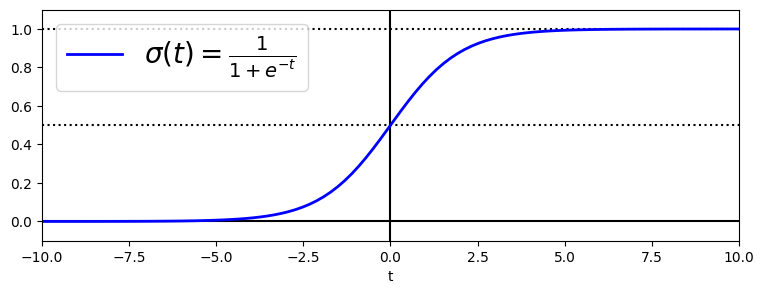

In [25]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1+np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1+e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize = 20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4784\2830735679.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(pred_value, -np.log(pred_value), label = r"$-\log(\hat{p})$ Ture")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4784\2830735679.py:3: RuntimeWarning: invalid value encountered in log
  plt.plot(pred_value, -np.log(pred_value), label = r"$-\log(\hat{p})$ Ture")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4784\2830735679.py:4: RuntimeWarning: invalid value encountered in log
  plt.plot(pred_value, -np.log(1 - pred_value), label = r"$-\log(1- \hat{p})$ False")


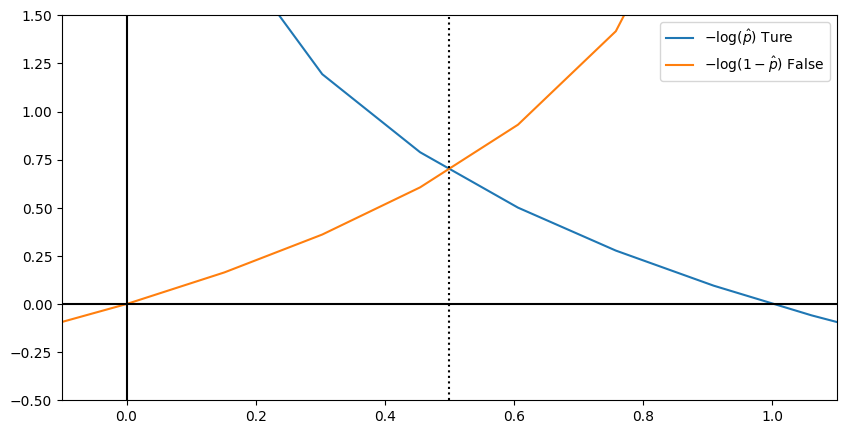

In [26]:
pred_value = np.linspace(-5,10, 100)
plt.figure(figsize=(10,5))
plt.plot(pred_value, -np.log(pred_value), label = r"$-\log(\hat{p})$ Ture")
plt.plot(pred_value, -np.log(1 - pred_value), label = r"$-\log(1- \hat{p})$ False")
plt.plot([-0.1,1.1], [0.0,0.0], "k")
plt.plot([0.0, 0.0], [-0.5,1.5], "k")
plt.plot([0.5, 0.5], [-0.5,1.5], "k:")
plt.axis([-0.1, 1.1, -0.5, 1.5])
plt.legend()
plt.show()

In [27]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [28]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(int)

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

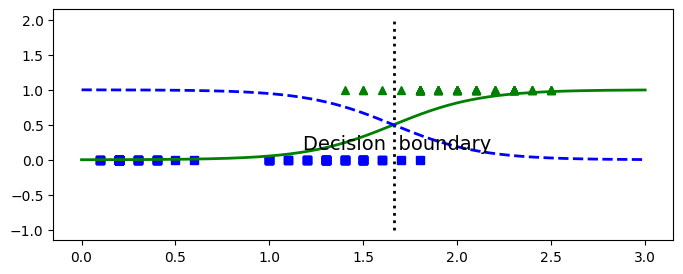

In [30]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [31]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [32]:
x = np.array([3.0, 1.0, 0.2])
softmax(x).sum()

0.9999999999999999

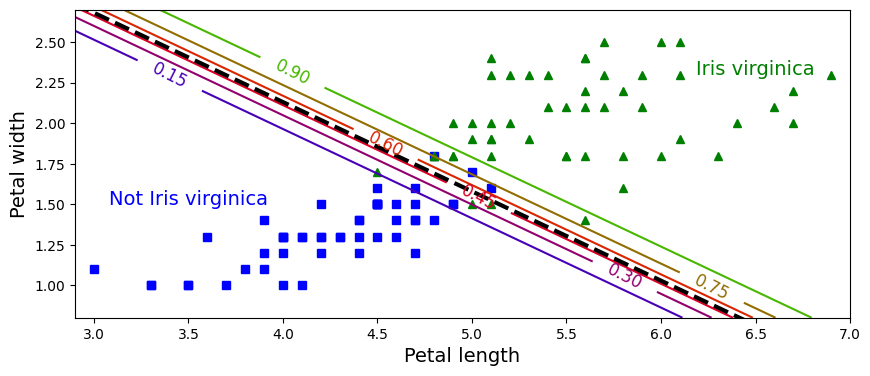

In [35]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline= 1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()
